<a href="https://colab.research.google.com/github/SayaliSPotdar/CodeClause_Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

# **Import Dataset**

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/train_u6lujuX_CVtuZ9i.csv")

# **check Top 5 Rows of The Dataset**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Find Shape of Dataset (Number of Rows And Number of Columns)**

In [ ]:
df.shape

(614, 13)

# **Check dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Check Columns**

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# **Check Description of data**

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Check Missing Values**

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Drop the column which are not required**

In [ ]:
df.drop(columns=['Loan_ID','Dependents'],inplace=True)

In [ ]:
df.columns


Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# **Check for Duplicate Values and value counts**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [ ]:
df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [ ]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [ ]:
df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [ ]:
df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

# **Data Visualization**

<function matplotlib.pyplot.show(close=None, block=None)>

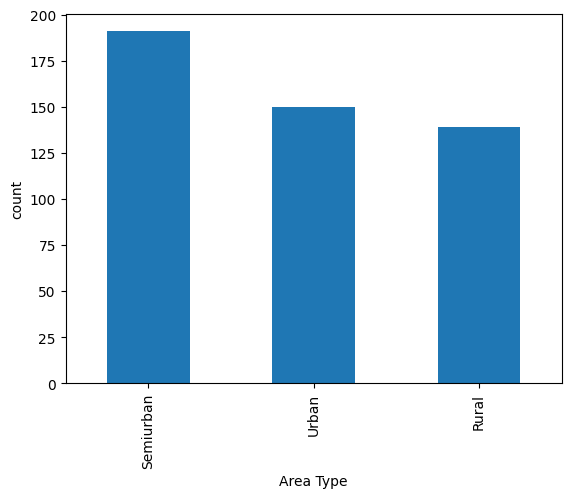

In [ ]:
df['Property_Area'].value_counts().plot(kind='bar')

plt.xlabel("Area Type")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

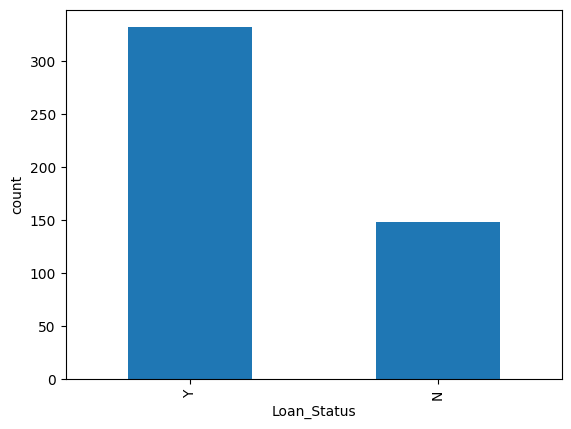

In [ ]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.xlabel("Loan_Status")
plt.ylabel("count")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

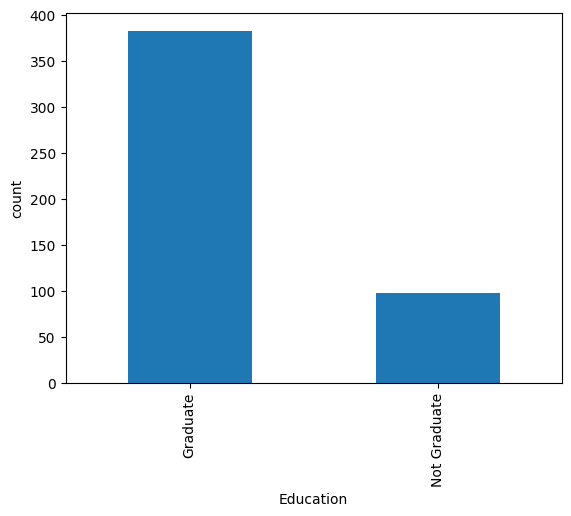

In [ ]:
df['Education'].value_counts().plot(kind='bar')
plt.xlabel("Education")
plt.ylabel("count")
plt.show

# **Check corelation**

In [ ]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<ipython-input-30-25d837c6d0b9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

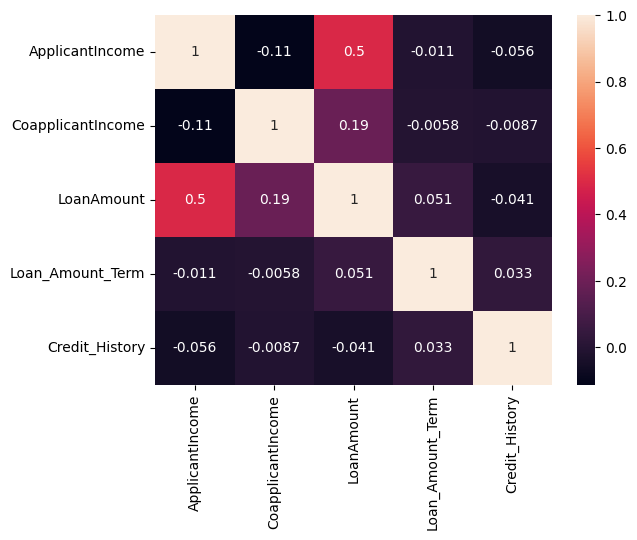

In [ ]:
import seaborn as  sns
sns.heatmap(df.corr(),annot=True)

# **Convert categorical feature into Numerical**

In [ ]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Married'] = df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Property_Area'] =df['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2}).astype('int')
df['Loan_Status'] = df['Loan_Status'].map({'Y':1,'N':0}).astype('int')


In [ ]:
df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,1,1,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,1,1,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,1,1,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0
10,1,1,1,0,3200,700.0,70.0,360.0,1.0,1,1


# **Split data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=np.array(df[["Gender","Married","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]])
y=np.array(df["Loan_Status"])

# **Decision Tree**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
print(model.score(X_test,y_test))

0.75


# **Prediction**

In [ ]:
#features=["Gender","Married","Education","Self_Employed","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History","Property_Area"]
features1=np.array([[1,	1	,1,	1,	3000	,0.0,	66.0	,360.0,	1.0,	1]])

In [ ]:
print(model.predict(features1))

[1]


 Value 1 shows Loan Status Yes

In [ ]:
features2=np.array([[1,1,1,0,3036,2504.0,158.0,360.0,0.0,2]])

In [ ]:
print(model.predict(features2))

[0]


 Value 0 shows Loan Status No

# **Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(X_train,y_train)

LogisticRegression()

# **Prediction**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7604166666666666


In [ ]:
print("Classification Report:\n", classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        28
           1       0.84      0.82      0.83        68

    accuracy                           0.76        96
   macro avg       0.71      0.72      0.71        96
weighted avg       0.76      0.76      0.76        96



In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[17 11]
 [12 56]]


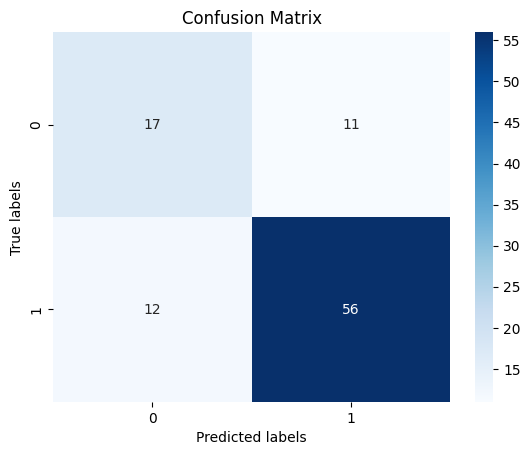

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model3 = RandomForestClassifier(n_estimators=100,random_state=42)

In [ ]:
model3.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.8333333333333334


In [ ]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.50      0.64        28
           1       0.82      0.97      0.89        68

    accuracy                           0.83        96
   macro avg       0.85      0.74      0.76        96
weighted avg       0.84      0.83      0.82        96



In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[14 14]
 [ 2 66]]


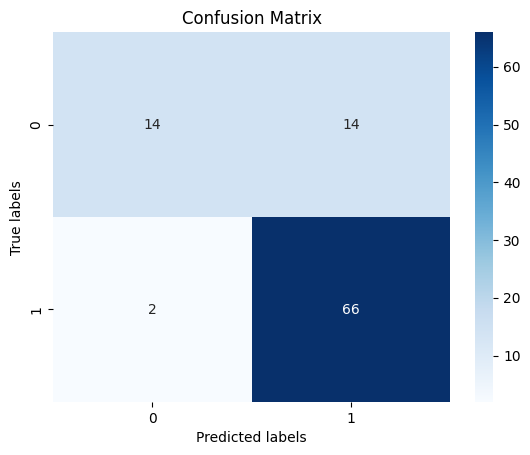

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model4=SVC()

In [ ]:
model4.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.7083333333333334


In [ ]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.71      1.00      0.83        68

    accuracy                           0.71        96
   macro avg       0.35      0.50      0.41        96
weighted avg       0.50      0.71      0.59        96



In [ ]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[ 0 28]
 [ 0 68]]


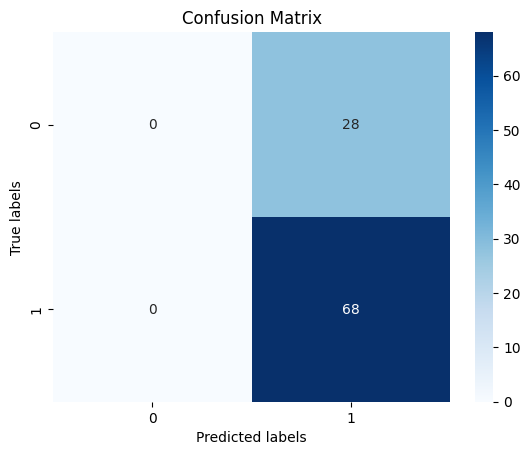

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()